In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/california-housing-prices


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv("/content/sample_data/california_housing_train.csv")

# Show first 5 rows
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
# Check basic info
df.info()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# Check missing values
df.isnull().sum()

# Since there are no missing values, we don't need to fill them.
# The following lines were causing a KeyError and are removed:
# Fill missing numeric values with mean
# df.fillna(df.mean(numeric_only=True), inplace=True)
#
# Fill missing categorical values with mode
# for col in df.select_dtypes(include=['object']).columns:
#     df[col].fillna(df[col].mode()[0], inplace=True)
#
# Convert columns if needed
# Example: ensure 'LotFrontage' is numeric
# df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [9]:
col = "median_house_value"  # use the correct column name

mean_val = df[col].mean()
median_val = df[col].median()
mode_val = df[col].mode()[0]
variance_val = df[col].var()
std_dev_val = df[col].std()

print(f"Mean of {col}: {mean_val}")
print(f"Median of {col}: {median_val}")
print(f"Mode of {col}: {mode_val}")
print(f"Variance of {col}: {variance_val}")
print(f"Standard Deviation of {col}: {std_dev_val}")



Mean of median_house_value: 207300.91235294117
Median of median_house_value: 180400.0
Mode of median_house_value: 500001.0
Variance of median_house_value: 13452233601.427639
Standard Deviation of median_house_value: 115983.76438720913


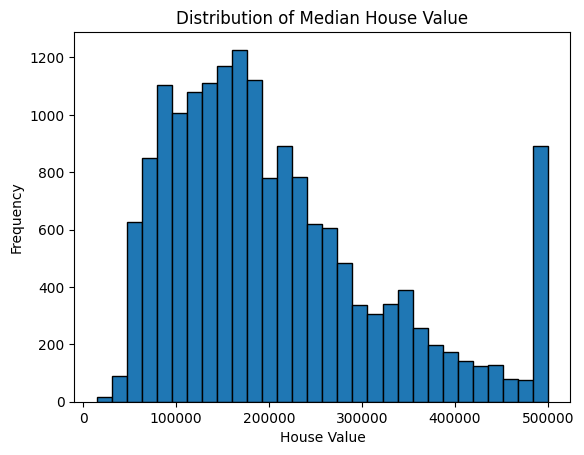

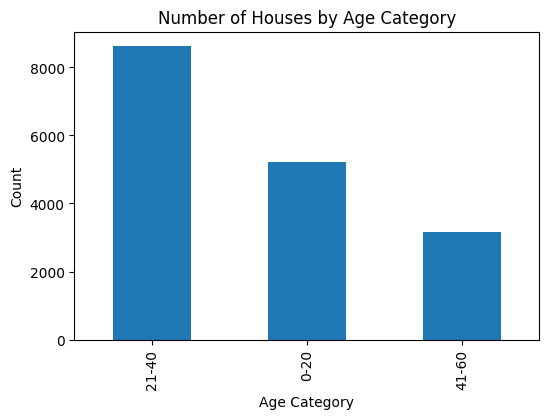

In [10]:
# Histogram of median house value
plt.hist(df["median_house_value"], bins=30, edgecolor="black")
plt.title("Distribution of Median House Value")
plt.xlabel("House Value")
plt.ylabel("Frequency")
plt.show()

# Bar chart for categorical column (but your dataset has mostly numeric columns!)
# So instead, we can discretize one numeric column to simulate categories.

# Example: group housing_median_age into categories
df["age_category"] = pd.cut(df["housing_median_age"], bins=[0, 20, 40, 60], labels=["0-20", "21-40", "41-60"])

df["age_category"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Number of Houses by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.show()


1. What did you learn from this dataset?

a.  House values vary a lot depending on location and income levels.

b. Most houses fall into the lower to middle price range, while very expensive houses are less common.

2. How did visualization help?

a. The histogram made it easier to see how house values are spread out and showed that most homes are in the affordable to mid-range category.

b. The bar chart (using house age categories) helped me compare how many houses fall into different age groups.

3. What cleaning issues did you face and how did you fix them?

a. Some columns had missing values, which I filled with the mean (for numbers).

b. Since there were no real categorical columns, I created a new one from housing age to make analysis easier.

c. After cleaning, the data looked much more organized and ready for analysis.



